In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

FFNN Benchmark

In [ ]:
col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
ffdf = pd.read_csv("Train.csv")
for header in col:
  temp_df = pd.DataFrame(ffdf[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df[column].fillna(temp_df[column].mean(), inplace=True)
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)
    
  new_dfs.append(temp_df)
  ffdf.drop(header, axis=1, inplace=True)

new_dfs.append(ffdf)
ffdf2 = pd.concat(new_dfs, axis=1)
ffdf2

,temp_0,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_10,temp_11,temp_12,temp_13,temp_14,temp_15,temp_16,temp_17,temp_18,temp_19,temp_20,temp_21,temp_22,temp_23,temp_24,temp_25,temp_26,temp_27,temp_28,temp_29,temp_30,temp_31,temp_32,temp_33,temp_34,temp_35,temp_36,temp_37,temp_38,temp_39,...,atmos_press_84,atmos_press_85,atmos_press_86,atmos_press_87,atmos_press_88,atmos_press_89,atmos_press_90,atmos_press_91,atmos_press_92,atmos_press_93,atmos_press_94,atmos_press_95,atmos_press_96,atmos_press_97,atmos_press_98,atmos_press_99,atmos_press_100,atmos_press_101,atmos_press_102,atmos_press_103,atmos_press_104,atmos_press_105,atmos_press_106,atmos_press_107,atmos_press_108,atmos_press_109,atmos_press_110,atmos_press_111,atmos_press_112,atmos_press_113,atmos_press_114,atmos_press_115,atmos_press_116,atmos_press_117,atmos_press_118,atmos_press_119,atmos_press_120,ID,location,target
0,22.923816,22.930973,22.933465,22.928579,22.918572,22.904652,22.890893,22.878355,22.868956,22.856255,22.839972,22.822462,22.805578,22.787342,22.771216,22.764116,22.765021,22.776059,22.797791,22.827766,22.857438,22.886210,22.909365,22.928038,22.943181,22.946935,22.941668,22.932446,22.923289,22.912079,22.899729,22.888372,22.877963,22.861521,22.840455,22.816759,22.793551,22.771164,22.750696,22.744308,...,89.070413,89.070849,89.071726,89.072748,89.074198,89.075140,89.076066,89.076305,89.075925,89.074689,89.073034,89.071084,89.069366,89.067963,89.067331,89.067059,89.067425,89.068221,89.069075,89.069449,89.069794,87.777273,87.652500,87.614167,87.637500,87.717500,87.762500,87.790833,87.814167,87.858333,87.871667,87.802500,87.761667,87.743333,87.715833,87.750833,87.768333,ID_train_0,C,45.126304
1,22.533333,21.716667,20.833333,20.983333,20.875000,20.141667,19.375000,18.791667,18.775000,18.641667,18.558333,18.533333,19.608333,21.916667,24.716667,26.658333,29.175000,30.700000,31.433333,32.333333,33.008333,33.391667,33.616667,31.091667,27.550000,26.658333,25.675000,26.425000,23.783333,22.416667,22.041667,21.008333,21.475000,21.825000,21.158333,22.308333,23.116667,22.333333,23.850000,23.825000,...,90.470000,90.534167,90.617500,90.665833,90.668333,90.555000,90.434167,90.389167,90.391667,90.344167,90.311667,90.301667,90.368333,90.462500,90.563333,90.646667,90.678333,90.681667,90.634167,90.560000,90.511667,90.465833,90.515833,90.563333,90.603333,90.682500,90.725000,90.707500,90.682500,90.604167,90.481667,90.354167,90.272500,90.266667,90.325833,90.439167,90.529167,ID_train_1,D,79.131702
2,28.975000,27.950000,29.600000,26.425000,22.091667,21.775000,22.333333,21.950000,20.441667,20.441667,20.950000,19.800000,19.591667,19.575000,19.516667,19.550000,19.783333,19.908333,19.516667,19.666667,20.683333,22.491667,23.708333,24.900000,26.058333,27.325000,27.866667,28.291667,22.136364,19.141667,19.991667,20.216667,20.433333,20.466667,20.800000,20.958333,20.641667,20.033333,19.825000,19.616667,...,88.538333,88.465833,88.417500,88.385833,88.380833,88.390000,88.418333,88.450833,88.504167,88.522500,88.505000,88.433333,88.356667,88.278333,88.161667,88.059167,88.001667,87.982500,88.005833,88.064167,88.154167,88.280833,88.345833,88.419167,88.439167,88.374167,88.335000,88.287500,88.301667,88.353333,88.409167,88.448333,88.500000,88.495000,88.515833,88.475833,88.415833,ID_train_10,A,32.661304
3,22.966667,24.266667,25.275000,25.625000,25.866667,25.091667,24.025000,22.425000,20.233333,17.416667,17.391667,17.083333,17.516667,17.825000,18.258333,17.950000,17.575000,17.425000,17.475000,16.941667,18.233333,21.166667,23.708333,24.941667,25.825000,26.691667,27.275000,27.491667,21.136364,19.650000,19.391667,19.116667,19.075000,19.541667,19.450000,19.175000,18.891667,19.058333,19.325000,19.400000,...,88.620833,88.589167,88.595000,88.604167,88.600000,88.576667,88.589167,88.617500,88.628333,88.685000,88.665000,88.619167,88.546667,88.450000,88.342500,88.278333,88.200000,88.205000,88.212500,88.248333,88.347500,88.423333,88.480000,88.515000,88.501667,88.432500,88.362500,88.326667,88.334

In [ ]:
ffdf2['location'] = pd.Categorical(ffdf2['location']).codes
fftarget = ffdf2.pop('target')
fftarget

0         45.126304
1         79.131702
2         32.661304
3         53.850238
4        177.418750
            ...    
15534     44.850286
15535     24.330455
15536     38.972128
15537     41.720952
15538    127.983333
Name: target, Length: 15539, dtype: float64

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=[727]))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                46592     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ffdf2.drop("ID", axis=1, inplace=True)
ffdf2.shape

(15539, 727)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mse'])

history = model.fit(ffdf2[:(len(ffdf2) // 10) * 8], fftarget[:(len(fftarget) // 10) * 8], epochs=1000, callbacks=[early_stop], validation_data=(ffdf2[(len(ffdf2) // 10) * 8:], fftarget[(len(fftarget) // 10) * 8:]))

Epoch 1/1000
389/389 [==============================] - 1s 3ms/step - loss: 1520.8439 - mse: 1520.8439 - val_loss: 1882.0774 - val_mse: 1882.0774
Epoch 2/1000
389/389 [==============================] - 1s 3ms/step - loss: 1512.5900 - mse: 1512.5900 - val_loss: 1521.6989 - val_mse: 1521.6989
Epoch 3/1000
389/389 [==============================] - 1s 3ms/step - loss: 1495.1534 - mse: 1495.1534 - val_loss: 1658.2311 - val_mse: 1658.2311
Epoch 4/1000
389/389 [==============================] - 1s 3ms/step - loss: 1488.8828 - mse: 1488.8828 - val_loss: 1507.4347 - val_mse: 1507.4347
Epoch 5/1000
389/389 [==============================] - 1s 3ms/step - loss: 1475.0375 - mse: 1475.0375 - val_loss: 1487.3934 - val_mse: 1487.3934
Epoch 6/1000
389/389 [==============================] - 1s 3ms/step - loss: 1475.2904 - mse: 1475.2904 - val_loss: 1490.7161 - val_mse: 1490.7161
Epoch 7/1000
389/389 [==============================] - 1s 3ms/step - loss: 1467.1460 - mse: 1467.1460 - val_loss: 1782.4980

Weather prediction accuracy

In [ ]:
df = pd.read_csv("Train.csv")

df_locs = {}
df_locs['A'] = df[df["location"] == 'A']
df_locs['B'] = df[df["location"] == 'B']
df_locs['C'] = df[df["location"] == 'C']
df_locs['D'] = df[df["location"] == 'D']
df_locs['E'] = df[df["location"] == 'E']

col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
munged_data = {}
targets = {}
for key in df_locs:
  df_locs[key].drop("location",axis=1, inplace=True)
  df_locs[key].drop("ID",axis=1,  inplace=True) 
  new_dfs= []
  df2=df_locs[key]
  for header in col:
    temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
    for i, column in enumerate(list(temp_df.columns)):
      temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
      temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)

    new_dfs.append(temp_df)
    df2.drop(header, axis=1, inplace=True)

  tt = np.stack(new_dfs)
  t_array = tt
  t_array = t_array.transpose([1,2,0])
  samples = []
  tgts = []
  for s in t_array:
    working_df = pd.DataFrame(s)
    working_df.dropna(inplace=True)
    if len(working_df > 20):
      for i in range(0,len(working_df)-21):
        samples.append(working_df.iloc[i:i+20])
        tgts.append(working_df.iloc[i+21]) 
  munged_data[key] = np.stack(samples)
  targets[key] = np.stack(tgts)

(munged_data['A'].shape, targets['A'].shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((361359, 20, 6), (361359, 6))

In [ ]:
predictor = {}
for i in ['A','B','C','D','E']:
  new_model = tf.keras.models.Sequential()
  new_model.add(tf.keras.layers.BatchNormalization(input_shape=(20,6)))
  new_model.add(tf.keras.layers.LSTM(32))
  new_model.add(tf.keras.layers.Dense(6))
  new_model.load_weights("training_%s.ckpt" % (i)).expect_partial()
  new_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse')
  predictor[i] = new_model

predictor['A'].summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_20 (Batc (None, 20, 6)             24        
_________________________________________________________________
lstm_20 (LSTM)               (None, 32)                4992      
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 198       
Total params: 5,214
Trainable params: 5,202
Non-trainable params: 12
_________________________________________________________________


In [ ]:
results = {}
for i in ['A','B','C','D','E']:
  results[i] = predictor[i].evaluate(munged_data[i], targets[i])


3483/5308 [==================>...........] - ETA: 6s - loss: 148.1635

KeyboardInterrupt: ignored

In [ ]:
all_b_results = {}
for i in ['A','B','C','D','E']:
  results[i] = predictor['B'].evaluate(munged_data[i], targets[i])

8433/8433 [==============================] - 27s 3ms/step - loss: 3799.0659


Create datasets for CNN runs

RNN Datasets

In [ ]:
targets = {}
df = pd.read_csv("Train.csv")
df_locs = {}
df_locs['A'] = df[df["location"] == 'A']
df_locs['B'] = df[df["location"] == 'B']
df_locs['C'] = df[df["location"] == 'C']
df_locs['D'] = df[df["location"] == 'D']
df_locs['E'] = df[df["location"] == 'E']
for key in df_locs:
  targets[key] = df_locs[key].pop("target")

for key in df_locs:
  df_locs[key] = np.load("newdata_%s.npy" % (key))

RNNdata = np.concatenate([df_locs['A'], df_locs['B'],df_locs['C'],df_locs['D'],df_locs['E']])

RNNtargets = np.concatenate([targets['A'], targets['B'],targets['C'],targets['D'],targets['E']])
RNNdata.shape

(15539, 121, 6)

In [ ]:
locs={}
for key in df_locs:
  locs[key] = [key] * len(df_locs[key])

all_locs = np.concatenate([locs['A'],locs['B'],locs['C'],locs['D'],locs['E']])

RNNloc_df = pd.DataFrame(all_locs)
RNNloc_df.columns=['location']
RNNloc_df

,location
0,A
1,A
2,A
3,A
4,A
...,...
15534,E
15535,E
15536,E
15537,E


In [ ]:
demos = pd.read_csv("airqo_metadata.csv")
demos.drop('dist_motorway',axis=1,inplace=True)
demos.drop('Unnamed: 0',axis=1,inplace=True)

#This line specifies the data to match ordering for
loc_df = RNNloc_df

def mergeLeftInOrder(x, y, on=None):
    x = x.copy()
    x["Order"] = np.arange(len(x))
    z = x.merge(y, how='left', on=on).set_index("Order").iloc[np.arange(len(x)), :]
    return z

location_md = mergeLeftInOrder(pd.DataFrame(loc_df), demos, 'location')
location_md.reset_index(inplace=True)
location_md.drop('location',axis=1,inplace=True)
location_md.drop('Order',axis=1,inplace=True)
for i, column in enumerate(list(location_md.columns)):
  location_md[column] = pd.to_numeric(location_md[column],errors='coerce')
  location_md[column].fillna(location_md[column].mean(), inplace=True)

location_train = location_md[:(len(location_md) // 10) * 8]
location_val = location_md[(len(location_md) // 10) * 8:]
RNNlocation_data = location_md
RNNlocation_data

,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
1,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
2,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
3,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
4,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
15535,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
15536,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
15537,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43


In [ ]:
def unison_shuffled_copies(a, b, c):
    assert len(a) == len(b)
    assert len(b) == len(c)
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p]

In [ ]:
newdata = []
newtargets = []
newlocs = []
for index in range(0,len(RNNdata)):
  timeseries = RNNdata[index]
  df = pd.DataFrame(timeseries)
  if not df.isnull().values.any():
    newdata.append(timeseries)
    newtargets.append(RNNtargets[index])
    newlocs.append(RNNlocation_data.loc[index])

RNNdata = np.asarray(newdata)
RNNtargets = np.asarray(newtargets)
RNNlocation_data = np.asarray(newlocs)
RNNdata, RNNtargets, RNNlocation_data = unison_shuffled_copies(RNNdata, RNNtargets, RNNlocation_data)

In [ ]:
(RNNdata.shape, RNNtargets.shape, RNNlocation_data.shape)

((14690, 121, 6), (14690,), (14690, 14))

Mean interpolated data

In [ ]:
df = pd.read_csv("Train.csv")
df.drop("ID", axis=1)
MIDlocation = df.pop("location")
MIDtargets = df.pop("target")

df2 = df

col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
for header in col:
  temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)

  temp_df = temp_df.T.fillna(temp_df.mean(axis=1)).T
  new_dfs.append(temp_df)
  df2.drop(header, axis=1, inplace=True)

MIDdata = np.stack(new_dfs)
MIDdata = MIDdata.transpose([1,2,0])
MIDdata.shape

KeyboardInterrupt: ignored

In [ ]:
demos = pd.read_csv("airqo_metadata.csv")
demos.drop('dist_motorway',axis=1,inplace=True)
demos.drop('Unnamed: 0',axis=1,inplace=True)

#This line specifies the data to match ordering for
loc_df = MIDlocation

location_md = mergeLeftInOrder(pd.DataFrame(loc_df), demos, 'location')
location_md.reset_index(inplace=True)
location_md.drop('location',axis=1,inplace=True)
location_md.drop('Order',axis=1,inplace=True)
for i, column in enumerate(list(location_md.columns)):
  location_md[column] = pd.to_numeric(location_md[column],errors='coerce')
  location_md[column].fillna(location_md[column].mean(), inplace=True)

location_train = location_md[:(len(location_md) // 10) * 8]
location_val = location_md[(len(location_md) // 10) * 8:]
MIDlocation_data = location_md
MIDlocation_data

,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
1,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99
2,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
3,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
4,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
15535,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
15536,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99
15537,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99


In [ ]:
(MIDdata.shape, MIDtargets.shape, MIDlocation_data.shape)

((15539, 121, 6), (15539,), (15539, 14))

Nonsense Interpolated Data

In [ ]:
df = pd.read_csv("Train.csv")
df.drop("ID", axis=1)
NIDlocation = df.pop("location")
NIDtargets = df.pop("target")

df2 = df

col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
new_dfs= []
for header in col:
  temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
  for i, column in enumerate(list(temp_df.columns)):
    temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
    temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)

  temp_df = temp_df.T.fillna(-1).T
  new_dfs.append(temp_df)
  df2.drop(header, axis=1, inplace=True)

NIDdata = np.stack(new_dfs)
NIDdata = NIDdata.transpose([1,2,0])
NIDdata.shape

(15539, 121, 6)

In [ ]:
demos = pd.read_csv("airqo_metadata.csv")
demos.drop('dist_motorway',axis=1,inplace=True)
demos.drop('Unnamed: 0',axis=1,inplace=True)

#This line specifies the data to match ordering for
loc_df = NIDlocation

location_md = mergeLeftInOrder(pd.DataFrame(loc_df), demos, 'location')
location_md.reset_index(inplace=True)
location_md.drop('location',axis=1,inplace=True)
location_md.drop('Order',axis=1,inplace=True)
for i, column in enumerate(list(location_md.columns)):
  location_md[column] = pd.to_numeric(location_md[column],errors='coerce')
  location_md[column].fillna(location_md[column].mean(), inplace=True)

location_train = location_md[:(len(location_md) // 10) * 8]
location_val = location_md[(len(location_md) // 10) * 8:]
NIDlocation_data = location_md
NIDlocation_data

,loc_altitude,km2,aspect,dist_trunk,dist_primary,dist_secondary,dist_tertiary,dist_unclassified,dist_residential,popn,hh,hh_cook_charcoal,hh_cook_firewood,hh_burn_waste
0,1178.3,8.5,168.7,32.885520,4794.704552,12.730489,72.459340,406.967815,13.931350,97895,26873,21316,751,9835
1,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99
2,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
3,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
4,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,1122.4,1.9,194.0,540.789488,14.695789,343.595039,575.917422,330.609776,254.307415,4763,809,508,43,142
15535,1186.5,1.6,121.0,850.423131,908.300999,1738.872942,137.722087,449.591885,3.836589,6064,1297,985,26,43
15536,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99
15537,980.8,0.8,90.0,540.789488,265.896472,731.334789,339.693908,76.024389,11.601442,3596,663,7,651,99


Define a function for splitting into training and validation sets

In [ ]:
def train_val_split(input_set):
  return (input_set[:(len(input_set) // 10) * 8], input_set[(len(input_set) // 10) * 8:])

Prepare the model

In [ ]:
weather_input = layers.Input(shape=(121,6))
demographic_input = layers.Input(shape=14)

x = layers.BatchNormalization()(weather_input)
x = layers.Conv1D(32, 24, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(64, 3, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(96, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(14, activation='relu')(x)
x = keras.Model(inputs=weather_input, outputs=x)

y = layers.LayerNormalization()(demographic_input)
y = keras.Model(inputs=demographic_input, outputs=y)

combined = layers.concatenate([x.output, y.output])

z = layers.Dense(64, activation='relu')(combined)
z = layers.Dropout(0.3)(z)
z = layers.Dense(1)(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mse'])

model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 121, 6)]     0                                            
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 121, 6)       24          input_9[0][0]                    
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 98, 32)       4640        batch_normalization_4[0][0]      
__________________________________________________________________________________________________
average_pooling1d_8 (AveragePoo (None, 49, 32)       0           conv1d_12[0][0]                  
___________________________________________________________________________________________

Train and test. MID first

In [ ]:
weather_train = train_val_split(MIDdata)[0]
location_train = train_val_split(MIDlocation_data)[0]
target_train = train_val_split(MIDtargets)[0]
weather_val = train_val_split(MIDdata)[1]
location_val = train_val_split(MIDlocation_data)[1]
target_val = train_val_split(MIDtargets)[1]

history = model.fit([weather_train,location_train], target_train, epochs=1000, callbacks=[early_stop], validation_data=([weather_val,location_val], target_val))

NameError: ignored

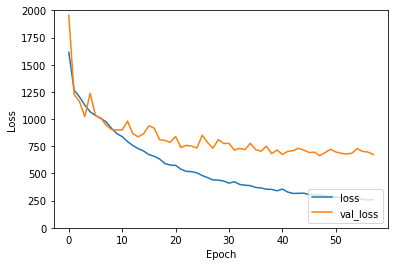

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2000])
plt.legend(loc='lower right')

In [ ]:
model.evaluate([weather_val,location_val], target_val)

98/98 [==============================] - 1s 6ms/step - loss: 674.7040 - mse: 674.7040


[674.7040405273438, 674.7040405273438]

NID next

In [ ]:
weather_input = layers.Input(shape=(121,6))
demographic_input = layers.Input(shape=14)

x = layers.BatchNormalization()(weather_input)
x = layers.Conv1D(32, 24, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(64, 3, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(96, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(14, activation='relu')(x)
x = keras.Model(inputs=weather_input, outputs=x)

y = layers.LayerNormalization()(demographic_input)
y = keras.Model(inputs=demographic_input, outputs=y)

combined = layers.concatenate([x.output, y.output])

z = layers.Dense(64, activation='relu')(combined)
z = layers.Dropout(0.3)(z)
z = layers.Dense(1)(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mse'])

model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 121, 6)]     0                                            
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 121, 6)       24          input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 98, 32)       4640        batch_normalization_2[0][0]      
__________________________________________________________________________________________________
average_pooling1d_4 (AveragePoo (None, 49, 32)       0           conv1d_6[0][0]                   
____________________________________________________________________________________________

In [ ]:
weather_train = train_val_split(NIDdata)[0]
location_train = train_val_split(NIDlocation_data)[0]
target_train = train_val_split(NIDtargets)[0]
weather_val = train_val_split(NIDdata)[1]
location_val = train_val_split(NIDlocation_data)[1]
target_val = train_val_split(NIDtargets)[1]

history = model.fit([weather_train,location_train], target_train, epochs=1000, callbacks=[early_stop], validation_data=([weather_val,location_val], target_val))

Epoch 1/1000
389/389 [==============================] - 6s 17ms/step - loss: 1755.5729 - mse: 1755.5729 - val_loss: 1335.3405 - val_mse: 1335.3405
Epoch 2/1000
389/389 [==============================] - 6s 17ms/step - loss: 1418.1418 - mse: 1418.1418 - val_loss: 1297.6018 - val_mse: 1297.6018
Epoch 3/1000
389/389 [==============================] - 6s 16ms/step - loss: 1291.7747 - mse: 1291.7747 - val_loss: 1392.9634 - val_mse: 1392.9634
Epoch 4/1000
389/389 [==============================] - 7s 18ms/step - loss: 1216.2603 - mse: 1216.2603 - val_loss: 1069.0280 - val_mse: 1069.0280
Epoch 5/1000
389/389 [==============================] - 7s 17ms/step - loss: 1160.4545 - mse: 1160.4545 - val_loss: 1250.0457 - val_mse: 1250.0457
Epoch 6/1000
389/389 [==============================] - 6s 16ms/step - loss: 1116.6949 - mse: 1116.6949 - val_loss: 1437.5090 - val_mse: 1437.5090
Epoch 7/1000
389/389 [==============================] - 7s 17ms/step - loss: 1061.2692 - mse: 1061.2692 - val_loss: 10

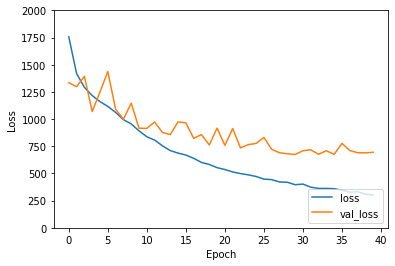

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2000])
plt.legend(loc='lower right')

In [ ]:
model.evaluate([weather_val,location_val], target_val)

98/98 [==============================] - 1s 6ms/step - loss: 694.6830 - mse: 694.6830


[694.6829833984375, 694.6829833984375]

Finally, RNN Data

In [ ]:
weather_input = layers.Input(shape=(121,6))
demographic_input = layers.Input(shape=14)

x = layers.BatchNormalization()(weather_input)
x = layers.Conv1D(32, 24, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(64, 3, activation='relu')(x)
x = layers.AveragePooling1D()(x)
x = layers.Conv1D(96, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(14, activation='relu')(x)
x = keras.Model(inputs=weather_input, outputs=x)

y = layers.LayerNormalization()(demographic_input)
y = keras.Model(inputs=demographic_input, outputs=y)

combined = layers.concatenate([x.output, y.output])

z = layers.Dense(64, activation='relu')(combined)
z = layers.Dropout(0.3)(z)
z = layers.Dense(1)(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss='mse',
              metrics=['mse'])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 121, 6)]     0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 121, 6)       24          input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 98, 32)       4640        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
average_pooling1d_2 (AveragePoo (None, 49, 32)       0           conv1d_3[0][0]                   
____________________________________________________________________________________________

In [ ]:
weather_train = train_val_split(RNNdata)[0]
location_train = train_val_split(RNNlocation_data)[0]
target_train = train_val_split(RNNtargets)[0]
weather_val = train_val_split(RNNdata)[1]
location_val = train_val_split(RNNlocation_data)[1]
target_val = train_val_split(RNNtargets)[1]

history = model.fit([weather_train,location_train], target_train, epochs=1000, callbacks=[early_stop], validation_data=([weather_val,location_val], target_val))

Epoch 1/1000
368/368 [==============================] - 7s 18ms/step - loss: 1645.2412 - mse: 1645.2412 - val_loss: 2083.3306 - val_mse: 2083.3306
Epoch 2/1000
368/368 [==============================] - 6s 17ms/step - loss: 1322.2698 - mse: 1322.2698 - val_loss: 1201.0140 - val_mse: 1201.0140
Epoch 3/1000
368/368 [==============================] - 6s 17ms/step - loss: 1225.4921 - mse: 1225.4921 - val_loss: 1052.6687 - val_mse: 1052.6687
Epoch 4/1000
368/368 [==============================] - 6s 16ms/step - loss: 1135.8843 - mse: 1135.8843 - val_loss: 1042.9336 - val_mse: 1042.9336
Epoch 5/1000
368/368 [==============================] - 6s 17ms/step - loss: 1124.9440 - mse: 1124.9440 - val_loss: 1089.0790 - val_mse: 1089.0790
Epoch 6/1000
368/368 [==============================] - 6s 17ms/step - loss: 1074.9695 - mse: 1074.9695 - val_loss: 1147.6417 - val_mse: 1147.6417
Epoch 7/1000
368/368 [==============================] - 6s 17ms/step - loss: 1053.1243 - mse: 1053.1243 - val_loss: 10

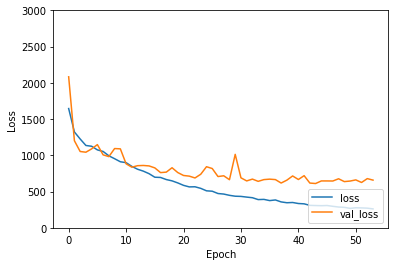

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3000])
plt.legend(loc='lower right')

In [ ]:
model.evaluate([weather_val,location_val], target_val)

92/92 [==============================] - 1s 6ms/step - loss: 657.7295 - mse: 657.7295


[657.7294921875, 657.7294921875]

==========================================================================================================================================

In [ ]:
munged_data = {}
targets = {}
df = pd.read_csv("Train.csv")
df_locs = {}
df_locs['A'] = df[df["location"] == 'A']
df_locs['B'] = df[df["location"] == 'B']
df_locs['C'] = df[df["location"] == 'C']
df_locs['D'] = df[df["location"] == 'D']
df_locs['E'] = df[df["location"] == 'E']

col = ["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]

for key in df_locs:
  targets[key] = df_locs[key].pop("target")
  df_locs[key].drop("ID",axis=1,  inplace=True) 
  new_dfs= []
  df2=df_locs[key]
  for header in col:
    temp_df = pd.DataFrame(df2[header].str.split(',').tolist())
    for i, column in enumerate(list(temp_df.columns)):
      temp_df[column] = pd.to_numeric(temp_df[column],errors='coerce')
      temp_df.rename(columns={ temp_df.columns[i]: header+'_'+str(column) }, inplace = True)

    new_dfs.append(temp_df)
    df2.drop(header, axis=1, inplace=True)

  munged_data[key] = np.stack(new_dfs).transpose([1,2,0])
  targets

FileNotFoundError: ignored

In [ ]:
models = {}
for lc in ['A','B','C','D','E']:
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=(20,6)))
  model.add(tf.keras.layers.LSTM(32))
  model.add(tf.keras.layers.Dense(6))
  model.load_weights("training_%s.ckpt" % lc).expect_partial()
  models[lc] = model

models['A'].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 20, 6)             24        
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,214
Trainable params: 5,202
Non-trainable params: 12
_________________________________________________________________


In [ ]:
def model_predict(model_index, vals):
  vals = np.reshape(vals, (1,20,6))
  return models[model_index].predict(vals)

In [ ]:
def interpolate(target_index, history, reverse, loc_index):
  #build up subhistory ndarray
  if reverse:
    sub_history = np.flip(history[target_index+1:target_index+21])
  else:
    sub_history = history[target_index-21:target_index-1]
  #if sub_history ndarray has nan
  if np.isnan(sub_history).any():
    if reverse:
      history = interpolate(target_index+1, history, reverse, loc_index)
      sub_history = np.flip(history[target_index+1:target_index+21])
    else:
      history = interpolate(target_index-1, history, reverse, loc_index)
      sub_history = history[target_index-21:target_index-1]

  prediction = model_predict(loc_index, sub_history)[0]
  for k in range(0,len(history[target_index])):
    feature = history[target_index][k]
    if np.isnan(feature):
      history[target_index][k] = prediction[k]
    #predict values
    #fill in array
  return history

In [ ]:
not_possible = []
for j in ['A','B','C','D','E']:
  for k in range(0, len(munged_data[j])):
    print((j, k))
    try:
      for i in range(0,len(munged_data[j][k])):
        time_slice = munged_data[j][k][i]
        if np.isnan(time_slice).any():
          munged_data[j][k] = interpolate(i, munged_data[j][k], i<=21, j)
    except:
      print("Unable to process %s %d" % (j,k))
      not_possible.append((j,k))

Streaming output truncated to the last 5000 lines.
('D', 2929)
('D', 2930)
('D', 2931)
('D', 2932)
('D', 2933)
('D', 2934)
('D', 2935)
('D', 2936)
('D', 2937)
('D', 2938)
('D', 2939)
('D', 2940)
('D', 2941)
('D', 2942)
('D', 2943)
('D', 2944)
('D', 2945)
('D', 2946)
('D', 2947)
('D', 2948)
('D', 2949)
('D', 2950)
('D', 2951)
('D', 2952)
('D', 2953)
('D', 2954)
('D', 2955)
('D', 2956)
('D', 2957)
('D', 2958)
('D', 2959)
('D', 2960)
('D', 2961)
('D', 2962)
('D', 2963)
('D', 2964)
('D', 2965)
('D', 2966)
('D', 2967)
('D', 2968)
('D', 2969)
('D', 2970)
('D', 2971)
('D', 2972)
('D', 2973)
('D', 2974)
('D', 2975)
('D', 2976)
('D', 2977)
('D', 2978)
('D', 2979)
('D', 2980)
('D', 2981)
('D', 2982)
('D', 2983)
('D', 2984)
('D', 2985)
('D', 2986)
('D', 2987)
('D', 2988)
('D', 2989)
('D', 2990)
('D', 2991)
('D', 2992)
('D', 2993)
('D', 2994)
('D', 2995)
('D', 2996)
('D', 2997)
('D', 2998)
('D', 2999)
('D', 3000)
('D', 3001)
('D', 3002)
('D', 3003)
('D', 3004)
('D', 3005)
('D', 3006)
('D', 3007)
(

In [ ]:
for d in ['A','B','C','D','E']:
  np.save('newdata_%s' % (d), munged_data[d])

In [ ]:
munged_data['A'].shape

(5122, 121, 6)